# Задача 1

In [274]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [275]:
sz = 100  # Размер выборки
x = norm.rvs(size=sz)

# Модель $N(\theta,1)$

Априорное распределение - $N(\mu_0, \sigma^2_0)$ with mean$=\mu_0$, $\mu=\frac{\sum_{i=1}^n X_i + \frac{\mu_0}{\sigma^2_0}}{\frac{1}{\sigma^2_0} + n}$. Следовательно, ${\theta^*=\frac{\sum_{i=1}^n X_i + \frac{\mu_0}{\sigma^2_0}}{\frac{1}{\sigma^2_0} + n}}$.

In [276]:
means = np.zeros(sz)  # Здесь будут храниться средние
for i in range(sz):
    means[i] = x[:i].mean()

In [277]:
def BayesEst1(x, a, sigma):
    return float((sum(x) + float(a/sigma**2))/(len(x) + (1./sigma**2)))

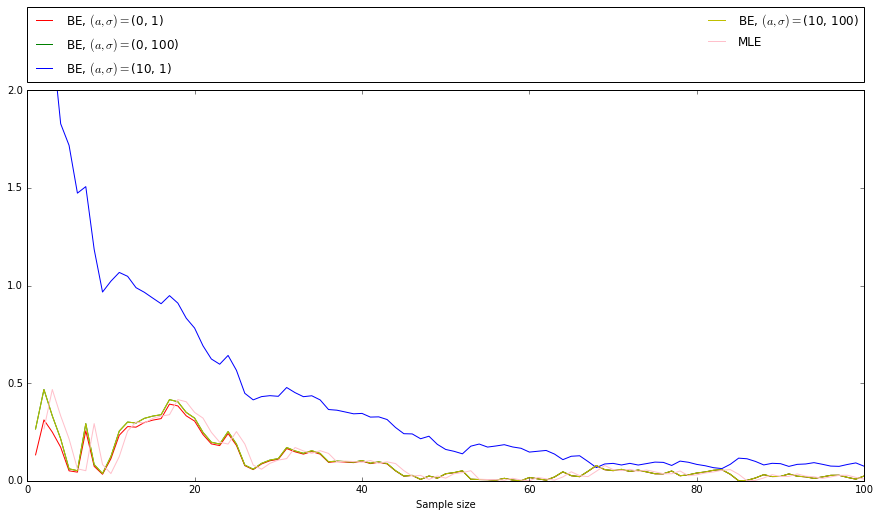

In [278]:
colors = ['r','g','b','y','pink']
params = np.array([(0,1), (0,100), (10,1), (10,100)])

plt.figure(figsize=(15,7))
col = 0
for par in params:
    tmp = np.array([BayesEst1(x[:(i+1)],par[0],par[1]) for i in range(sz)])
    plt.xlabel('Sample size')
    # BE stands for 'Bayes estimator'
    plt.plot(np.arange(1,sz+1), abs(tmp), color=colors[col], \
             label='BE, $(a, \sigma)=$({}, {})'.format(par[0], par[1]))
    col += 1

plt.plot(np.arange(1,sz+1), abs(means), color=colors[col], label='MLE')
plt.ylim((0,2))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, \
           mode="expand", borderaxespad=0.)
    
plt.show()

# Модель $N(0,\theta)$

Априорное распределение - Inverse-gamma Distribution $\Gamma_{inv}(\alpha_0, \beta_0)$ with mean$=\frac{\beta_0}{\alpha_0 - 1}$, where $\alpha_0-$ параметр сдвига, $\beta_0-$ параметр масштаба, ${\alpha=\alpha_0 + \frac{n}{2}, \beta=\beta_0 + \frac{\sum_{i=1}^n X_i^2}{2}}$. Следовательно, ${\theta^*=\frac{\beta}{\alpha - 1} = \frac{2\beta_0 + \sum_{i=1}^n X_i^2}{2\alpha_0 + n - 2}}$.

In [283]:
sigmas = np.zeros(sz)  # Здесь будут храниться выборочные дисперсии
for i in range(sz):
    sigmas[i] = var(x[:(i+1)])

In [284]:
def BayesEst2(x, alpha, beta):
#     return float(((2. * lambd) + alpha)/((2. * alpha) + sum([i**2 for i in x])))
    return float(((2. * beta) + sum([i**2 for i in x]))/((2. * alpha) + len(x) - 2.))

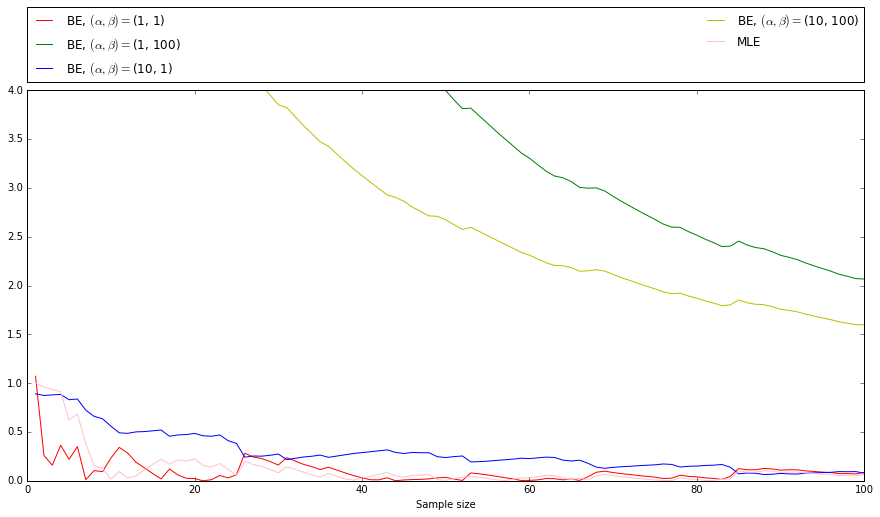

In [285]:
colors = ['r','g','b','y','pink']
params = np.array([(1,1), (1,100), (10,1), (10,100)])

plt.figure(figsize=(15,7))
col = 0
for par in params:
    tmp = np.array([BayesEst2(x[:(i+1)],par[0],par[1]) for i in range(sz)])
    plt.xlabel('Sample size')
    # BE stands for 'Bayes estimator'
    plt.plot(np.arange(1,sz+1), abs(tmp-1), color=colors[col], \
             label='BE, $(\\alpha, \\beta)=$({}, {})'.format(par[0], par[1]))
    col += 1

plt.plot(np.arange(1,sz+1), abs(sigmas-1), color=colors[col], label='MLE')
plt.ylim((0,4))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, \
           mode="expand", borderaxespad=0.)
    
plt.show()